In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [121]:
train = pd.read_csv('cnn_train.csv')
train.shape

(42000, 785)

In [122]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
test = pd.read_csv('cnn_test.csv')
test.shape

(28000, 784)

In [124]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)

In [126]:
y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [127]:
y_train[0]

1

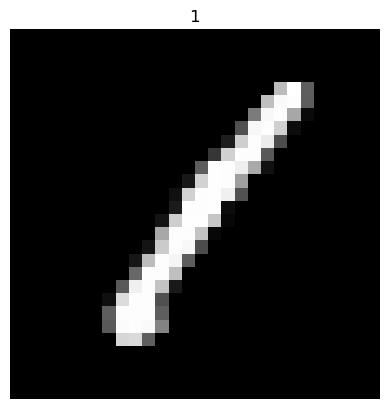

In [128]:
img = X_train.iloc[0].to_numpy()
img = img.reshape((28, 28)) # size
plt.imshow(img, cmap='gray')
plt.title(y_train[0])
plt.axis('off')
plt.show()

In [129]:
y_train[3]

4

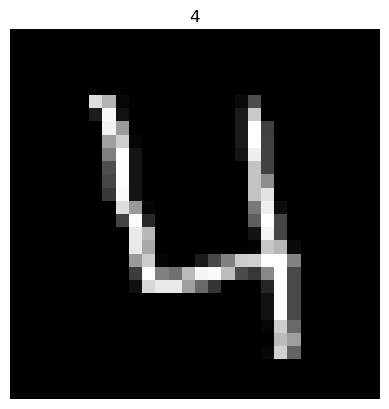

In [130]:
img = X_train.iloc[3].to_numpy() # 숫자 데이터를 numpy로 바꾸어 준 것
img = img.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.title(y_train[3])
plt.axis('off')
plt.show()

In [131]:
# 다음으로 정규화 및 reshape을 깔끔하게 처리해주는 작업을 해줄 것이다.

In [132]:
# 정규화
X_train = X_train/255.0
test = test/255.0

X_train.shape, test.shape

((42000, 784), (28000, 784))

In [133]:
# reshape(데이터 형태 변경)
# 마지막 1 : 채널 - RGB(red, green, blue(3개의 색깔 필요), 1을 쓴 이유(=흑백)
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

X_train.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [134]:
# one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)

In [135]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(37800, 28, 28, 1) (4200, 28, 28, 1)
(37800, 10) (4200, 10)


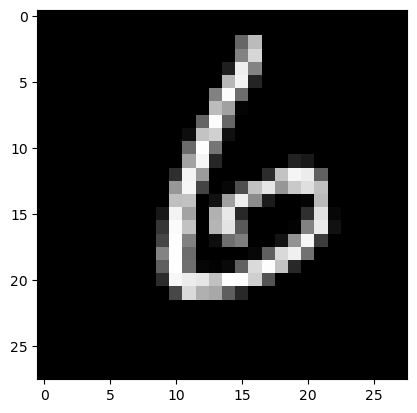

In [137]:
plt.imshow(X_train[2][:,:,0], cmap='gray')
plt.show()

In [138]:
from sklearn.metrics import confusion_matrix # 혼동행렬
import itertools # 객체화 처리

from tensorflow.keras.utils import to_categorical # 원핫인코딩
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D # 신경망 레이어드 
from keras.optimizers import RMSprop, Adam # 최적화 알고리즘
from keras.preprocessing.image import ImageDataGenerator # 이미지 전처리(데이터 증강)(과적합 방지)
from keras.callbacks import ReduceLROnPlateau # 콜백함수 처리

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D

model = Sequential()
# 입력 이미지와 동일한 크기의 출력(합성곱 연산 이후에 이미지 크기가 변하기 않게 처리를 하겠다.)(padding='Same')
model.add(Conv2D(filters = 8, kernel_size=(5, 5), activation='relu', padding = 'Same', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size=(3, 3), padding = 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [140]:
# 최적화 처리
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [141]:
epochs = 10
batch_size = 250

In [142]:
# 데이터 증강(Data Augmentation) -> 모델 향상

data = ImageDataGenerator(
    featurewise_center = False, # 전체 데이터셋의 평균을 0으로 만들 것인지 물어보는 코드(False -> 그렇지 않겠다.)
    samplewise_center = False, # 각 샘플의 평균을 0으로 만들 것인지 물어보는 코드
    featurewise_std_normalization=False, # 전체 데이터셋의 표준편차로 정규화를 할 것인지 물어보는 코드
    samplewise_std_normalization=False, # 각 샘플의 표준편차로 정규화를 할 것인지 물어보는 코드
    zca_whitening=False, # ZCA 백색화를 할 것인지 물어보는 코드
    rotation_range=5, # 이미지를 범위 내에서 무작위로 회전(5 -> 5도 내에서 무작위 회전)
    zoom_range=0.1, # 이미지를 범위 내에서 무작위로 확대/축소(0.1 -> 10% 범위 내에서 확대/축소)
    width_shift_range=0.1, # 이미지를 수평으로 범위 내에서 이동
    height_shift_range=0.1, # 이미지를 수직으로 범위 내에서 이동
    horizontal_flip=False, # 이미지를 수평으로 뒤집을지 물어보는 코드
    vertical_flip=False # 이미지를 수직으로 뒤집을지 물어보는 코드
)

data.fit(X_train)

In [143]:
history = model.fit_generator(data.flow(X_train, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data = (X_val, y_val), steps_per_epoch = X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 13s 83ms/step - loss: 1.1150 - accuracy: 0.6283 - val_loss: 0.2132 - val_accuracy: 0.9476
Epoch 2/10
151/151 [==============================] - 17s 110ms/step - loss: 0.4391 - accuracy: 0.8611 - val_loss: 0.1268 - val_accuracy: 0.9629
Epoch 3/10
151/151 [==============================] - 16s 107ms/step - loss: 0.3207 - accuracy: 0.8988 - val_loss: 0.0984 - val_accuracy: 0.9714
Epoch 4/10
151/151 [==============================] - 16s 103ms/step - loss: 0.2699 - accuracy: 0.9168 - val_loss: 0.0852 - val_accuracy: 0.9738
Epoch 5/10
151/151 [==============================] - 16s 108ms/step - loss: 0.2375 - accuracy: 0.9264 - val_loss: 0.0747 - val_accuracy: 0.9757
Epoch 6/10
151/151 [==============================] - 18s 118ms/step - loss: 0.2202 - accuracy: 0.9315 - val_loss: 0.0684 - val_accuracy: 0.9805
Epoch 7/10
151/151 [==============================] - 16s 105ms/step - loss: 0.2008 - accuracy: 0.9357 - val_loss: 0.0617 - val_acc

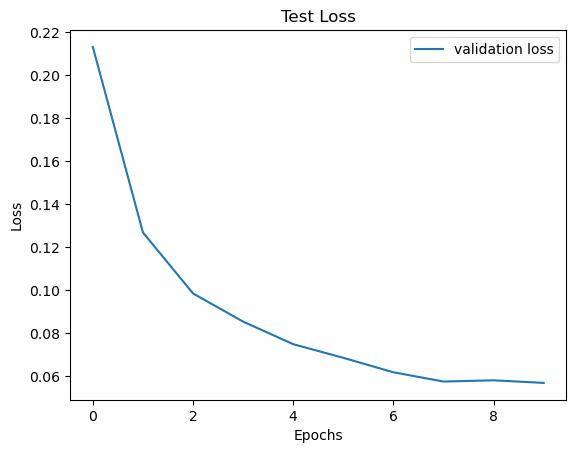

In [144]:
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [145]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

132/132 [==============================] - 1s 5ms/step


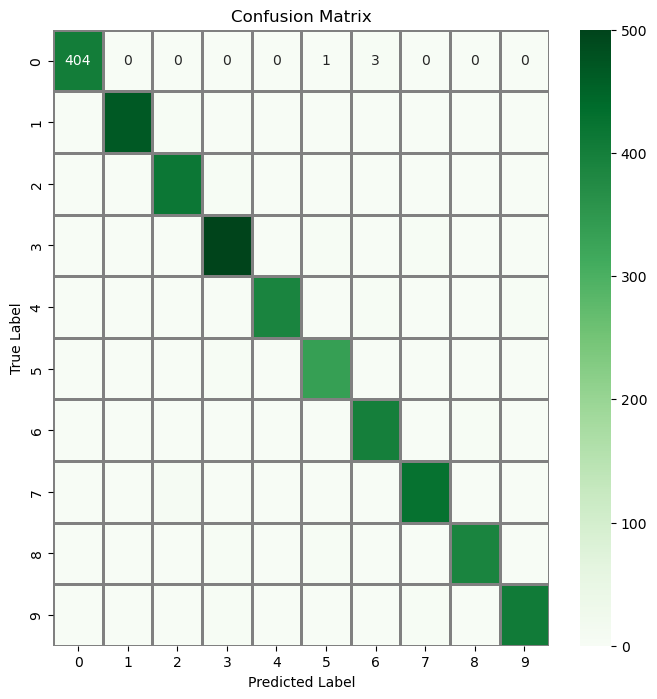

In [149]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, linewidths=1, cmap='Greens', linecolor='gray', fmt='.0f', ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()